# 用图像和地图绘制图表

## PIL图像处理

In [3]:
import os
import sys
from PIL import Image, ImageChops, ImageFilter


class DemoPIL(object):
    def __init__(self, image_file=None):
        self.fixed_filters = [ff for ff in dir(ImageFilter) if ff.isupper()]

        assert image_file is not None
        assert os.path.isfile(image_file) is True
        self.image_file = image_file
        self.image = Image.open(self.image_file)

    def run_fixed_filters_demo(self):
        self._make_temp_dir()
        for ffilter in self.fixed_filters:
            temp_img = self.apply_filter(ffilter)
            temp_img.save(self._get_temp_name(ffilter))
        print ("Images are in: {0}".format((self.ff_tempdir),))

    def _make_temp_dir(self):
        from tempfile import mkdtemp
        self.ff_tempdir = mkdtemp(prefix="ff_demo")

    def _get_temp_name(self, filter_name):
        name, ext = os.path.splitext(os.path.basename(self.image_file))
        newimage_file = name + "-" + filter_name + ext
        path = os.path.join(self.ff_tempdir, newimage_file)
        return path

    def _get_filter(self, filter_name):
        real_filter = eval("ImageFilter." + filter_name)
        return real_filter

    def apply_filter(self, filter_name):
        print ("Applying filter: " + filter_name)
        filter_callable = self._get_filter(filter_name)
        # prevent calling non-fixed filters for now
        if filter_name in self.fixed_filters:
            temp_img = self.image.filter(filter_callable)
        else:
            print ("Can't apply non-fixed filter now.")
        return temp_img

if __name__ == "__main__":
#     assert len(sys.argv) == 2
    demo_image ='images/sunset.jpg'
    demo = DemoPIL(demo_image)
    # will create set of images in temporary folder
    demo.run_fixed_filters_demo()

Applying filter: BLUR
Applying filter: CONTOUR
Applying filter: DETAIL
Applying filter: EDGE_ENHANCE
Applying filter: EDGE_ENHANCE_MORE
Applying filter: EMBOSS
Applying filter: FIND_EDGES
Applying filter: SHARPEN
Applying filter: SMOOTH
Applying filter: SMOOTH_MORE
Images are in: C:\Users\chenn\AppData\Local\Temp\ff_demoaqwq9_gr


In [36]:
import os
import sys
from math import floor
from PIL import Image


class Thumbnailer(object):
    def __init__(self, src_folder=None):
        self.src_folder = src_folder
        self.ratio = .3
        self.thumbnail_folder = "thumbnails"

    def _create_thumbnails_folder(self):
        thumb_path = os.path.join(self.src_folder, self.thumbnail_folder)
        if not os.path.isdir(thumb_path):
            os.makedirs(thumb_path)

    def _build_thumb_path(self, image_path):
        print(image_path)
        root = os.path.dirname(image_path)
        name, ext = os.path.splitext(os.path.basename(image_path))
        suffix = ".thumbnail"
        return os.path.join(root, self.thumbnail_folder, name + suffix + ext)

    def _load_files(self):
        
        self._files = set()
        for each in os.listdir(self.src_folder):
            print("load 1 file")
            if each[-4:]=='.jpg':
                self._files.add(each)

    def _thumb_size(self, size):
        return (int(size[0] * self.ratio), int(size[1] * self.ratio))

    def create_thumbnails(self):
        print(self.src_folder)
        self._create_thumbnails_folder()
        self._load_files()
        print(self._files)
        for each in self._files:
            print ("Processing: " + each)
            try:
                img = Image.open(self.src_folder+'/'+each)
                print("1111111")
                thumb_size = self._thumb_size(img.size)
                print("1111112")
                resized = img.resize(thumb_size, Image.ANTIALIAS)
                print("1111113")
                savepath = self._build_thumb_path(each)
                print("1111114")
                resized.save('images/'+savepath)
                print("1111115")
            except IOError as ex:
                print ("Error: " + str(ex))

if __name__ == "__main__":
    # Usage:
    # ch06_rec01_02_pil_thumbnails.py my_images
    #assert len(sys.argv) == 2
    src_folder = 'images'

    if not os.path.isdir(src_folder):
        print ("Error: Path '{0}' does not exits.".format((src_folder)))
        sys.exit(-1)

    thumbs = Thumbnailer(src_folder)

    # optionally set the name of theachumbnail folder.
    thumbs.thumbnail_folder = ".THUMBS"

    # define ratio to resize image to
    # 0.1 means the original image will be resized to 10% of its size
    thumbs.ratio = 0.1 
    
    # will create set of images in temporary folder
    thumbs.create_thumbnails()


images
load 1 file
load 1 file
load 1 file
{'sunset.jpg', 'yellow_flowers.jpg'}
Processing: sunset.jpg
1111111
1111112
1111113
sunset.jpg
1111114
1111115
Processing: yellow_flowers.jpg
1111111
1111112
1111113
yellow_flowers.jpg
1111114
1111115


## 绘制带图像的图表

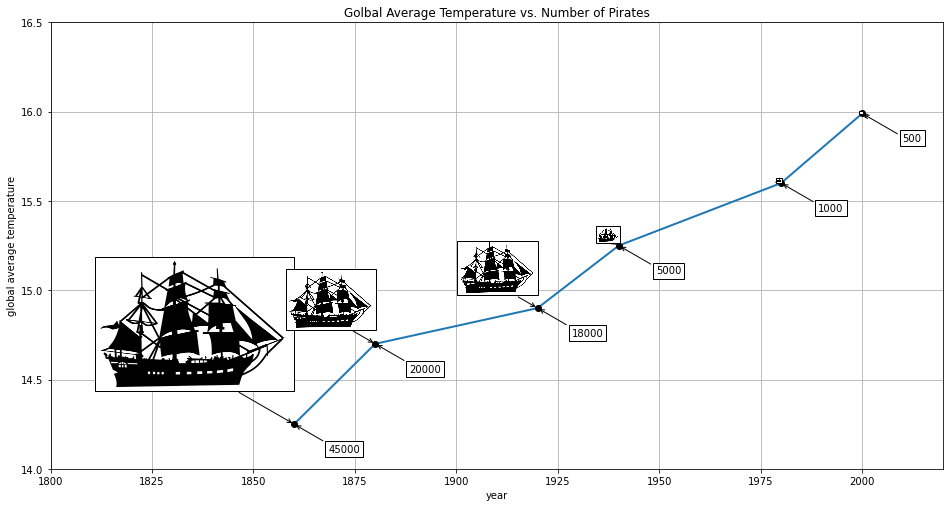

In [87]:
import matplotlib.pyplot as plt
from matplotlib._png import read_png
import matplotlib.image as img
from matplotlib.offsetbox import TextArea, OffsetImage, AnnotationBbox
def load_data():
    import csv
    with open('pirates_temperature.csv', 'r') as f:
        reader = csv.reader(f)
        header = next(reader)
        datarows = []
        for row in reader:
            datarows.append(row)
    return header, datarows
def format_data(datarows):
    years, temps, pirates = [], [], []
    for each in datarows:
        years.append(each[0])
        temps.append(each[1])
        pirates.append(each[2])
    return years, temps, pirates
if __name__ == '__main__':
    fig = plt.figure(figsize=(16, 8))
    ax = plt.subplot(111)
    header, datarows = load_data()
    xlabel, ylabel, _ = header  # 将列表中的元素赋值到三个变量中
    years, temperature, pirates = format_data(datarows)
    title = 'Golbal Average Temperature vs. Number of Pirates'
    plt.plot([int(i) for i in years], [float(i) for i in temperature], lw=2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    for x in range(len(years)):
        xy = int(years[x]), float(temperature[x])
        ax.plot(int(xy[0]), float(xy[1]), "ok")
        pirate = img.imread( 'images2/tall-ship.png' )
        #pirate = matplotlib._png.read_png('tall-ship.png')
        zoomc = int(pirates[x])*(1/90000.0)
        imagebox = OffsetImage(pirate, zoom=zoomc)  # 
        ab = AnnotationBbox(imagebox, xy, xybox=(-200.0*zoomc, 200.0*zoomc), xycoords='data', boxcoords="offset points", pad=0.1, arrowprops=dict(arrowstyle="->", connectionstyle="angle, angleA=0, angleB=-30, rad=3"))
        ax.add_artist(ab)
        no_pirates = TextArea(pirates[x], minimumdescent=False)
        ab = AnnotationBbox(no_pirates, xy, xybox=(50.0, -25.0), xycoords = 'data', boxcoords='offset points', pad=0.3, arrowprops=dict(arrowstyle="->", connectionstyle="angle, angleA=0, angleB=-30, rad=3"))
        ax.add_artist(ab)
    plt.grid()
    plt.xlim(1800, 2020)
    plt.ylim(14, 16.5)
    plt.title(title)
    plt.show()
    

## 在具有其他图形的图表中显示图像

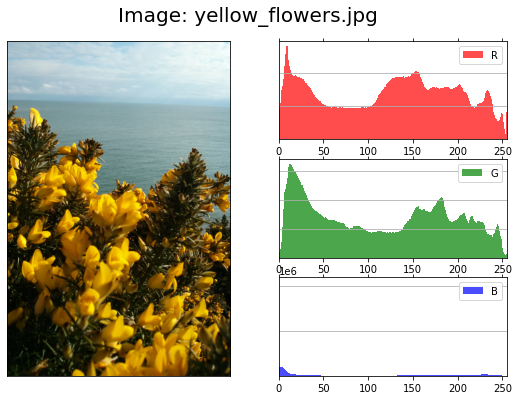

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mplimage
import matplotlib as mpl
import os


class ImageViewer(object):
    def __init__(self, imfile):
        self._load_image(imfile)
        self._configure()

        self.figure = plt.gcf()
        t = "Image: {0}".format(os.path.basename(imfile))
        self.figure.suptitle(t, fontsize=20)

        self.shape = (3, 2)

    def _configure(self):
        mpl.rcParams['font.size'] = 10
        mpl.rcParams['figure.autolayout'] = False
        mpl.rcParams['figure.figsize'] = (9, 6)
        mpl.rcParams['figure.subplot.top'] = .9

    def _load_image(self, imfile):
        self.im = mplimage.imread(imfile)

    @staticmethod
    def _get_chno(ch):
        chmap = {'R': 0, 'G': 1, 'B': 2}
        return chmap.get(ch, -1)

    def show_channel(self, ch):
        bins = 256
        ec = 'none'
        chno = self._get_chno(ch)
        loc = (chno, 1)
        ax = plt.subplot2grid(self.shape, loc)
        ax.hist(self.im[:, :, chno].flatten(), bins, color=ch, ec=ec,\
                label=ch, alpha=.7)
        ax.set_xlim(0, 255)
        plt.setp(ax.get_xticklabels(), visible=True)
        plt.setp(ax.get_yticklabels(), visible=False)
        plt.setp(ax.get_xticklines(), visible=True)
        plt.setp(ax.get_yticklines(), visible=False)
        plt.legend()
        plt.grid(True, axis='y')
        return ax

    def show(self):
        loc = (0, 0)
        axim = plt.subplot2grid(self.shape, loc, rowspan=3)
        axim.imshow(self.im)
        plt.setp(axim.get_xticklabels(), visible=False)
        plt.setp(axim.get_yticklabels(), visible=False)
        plt.setp(axim.get_xticklines(), visible=False)
        plt.setp(axim.get_yticklines(), visible=False)

        axr = self.show_channel('R')
        axg = self.show_channel('G')
        axb = self.show_channel('B')

        plt.show()

if __name__ == '__main__':
    im = 'images/yellow_flowers.jpg'
    try: 
        iv = ImageViewer(im)
        iv.show()
    except Exception as ex:
        print ('except')

## 使用basemap在地图上绘制数据

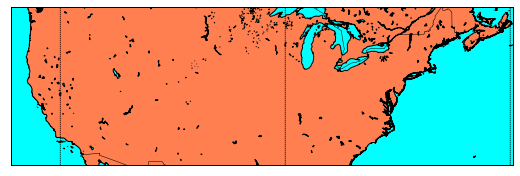

In [91]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

map = Basemap(projection='merc', 
              resolution = 'h', 
              area_thresh = 0.1,
    llcrnrlon=-126.619875, llcrnrlat=31.354158,
    urcrnrlon=-59.647219, urcrnrlat=47.517613)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color='coral', lake_color='aqua')
map.drawmapboundary(fill_color='aqua')
 
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
 
plt.show()

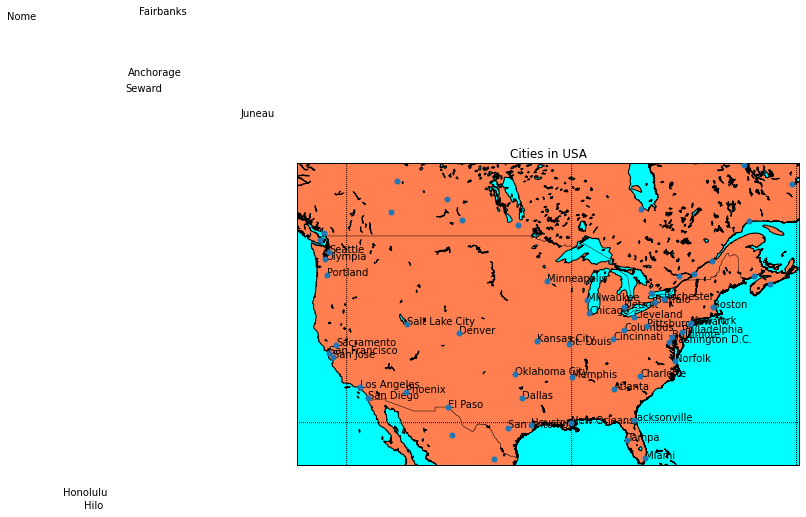

In [92]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

map = Basemap(projection='merc', 
              resolution = 'h', 
              area_thresh = 100,
    llcrnrlon=-126.619875, llcrnrlat=25,
    urcrnrlon=-59.647219, urcrnrlat=55)
 
shapeinfo = map.readshapefile('cities','cities')

x, y = zip(*map.cities)

# build a list of US cities
city_names = []
for each in map.cities_info:
    if each['COUNTRY'] != 'US':
        city_names.append("")
    else:
        city_names.append(each['NAME'])

map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color='coral', lake_color='aqua')
map.drawmapboundary(fill_color='aqua')
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))

# draw city markers
map.scatter(x,y,25, marker='o',zorder=10)

# plot labels at City coords.
for city_label, city_x, city_y in zip(city_names, x, y):
    plt.text(city_x, city_y, city_label)

plt.title('Cities in USA') 

plt.show()

In [90]:
import csv
import gviz_api

def get_page_template():
    page_template = """
    <html>
      <script src="https://www.google.com/jsapi" type="text/javascript"></script>
      <script>
        google.load('visualization', '1', {packages:['geochart', 'table']});

        google.setOnLoadCallback(drawMap);
        function drawMap() {
            var json_data = new google.visualization.DataTable(%s, 0.6);
            
            var options = {colorAxis: {colors: ['#eee', 'green']}};
            var mymap = new google.visualization.GeoChart(
                                document.getElementById('map_div'));
            mymap.draw(json_data, options);
            
            var mytable = new google.visualization.Table(
                                document.getElementById('table_div'));
            mytable.draw(json_data, {showRowNumber: true})
        }
      </script>
      <body>
        <H1>Median Monthly Disposable Salary World Countries</H1>

        <div id="map_div"></div>
        <hr />
        <div id="table_div"></div>

        <div id="source">
        <hr />
        <small>
        Source: 
        <a href="http://www.numbeo.com/cost-of-living/prices_by_country.jsp?displayCurrency=EUR&itemId=105">
        http://www.numbeo.com/cost-of-living/prices_by_country.jsp?displayCurrency=EUR&itemId=105
        </a>
        </small>
        </div>
      </body>
    </html>
    """
    return page_template


def main():
    # Load data from CVS file
    afile = "median-dpi-countries.csv"
    datarows = []
    with open(afile, 'r') as f:
        reader = csv.reader(f)
        next(reader)  # skip header
        for row in reader:
            datarows.append(row)

    # Describe data
    description = {"country": ("string", "Country"),
                       "dpi": ("number", "EUR"), }

    # Build list of dictionaries from loaded data
    data = []
    for each in datarows:
        data.append({"country": each[0],
                     "dpi": (float(each[1]), each[1])})

    # Instantiate DataTable with structure defined in 'description'
    data_table = gviz_api.DataTable(description)

    # Load it into gviz_api.DataTable
    data_table.LoadData(data)

    # Creating a JSon string
    json = data_table.ToJSon(columns_order=("country", "dpi"),
                             order_by="country", )
    
    # Put JSON string into the template
    # and save to output.html
    with open('output.html', 'w') as out:
        out.write(get_page_template() % (json,))

if __name__ == '__main__':
    main()


## 生成captcha图像

In [94]:
from PIL import Image, ImageDraw, ImageFont
import random
import string


class SimpleCaptchaException(Exception):
    pass


class SimpleCaptcha(object):
    def __init__(self, length=5, size=(200, 100), fontsize=36,
                 random_text=None, random_bgcolor=None):
        self.size = size
        self.text = "CAPTCHA"
        self.fontsize = fontsize
        self.bgcolor = 255
        self.length = length

        self.image = None  # current captcha image

        if random_text:
            self.text = self._random_text()

        if not self.text:
            raise SimpleCaptchaException("Field text must not be empty.")

        if not self.size:
            raise SimpleCaptchaException("Size must not be empty.")

        if not self.fontsize:
            raise SimpleCaptchaException("Font size must be defined.")

        if random_bgcolor:
            self.bgcolor = self._random_color()

    def _center_coords(self, draw, font):
        width, height = draw.textsize(self.text, font)
        xy = (self.size[0] - width) / 2., (self.size[1] - height) / 2.
        return xy

    def _add_noise_dots(self, draw):
        size = self.image.size
        for _ in range(int(size[0] * size[1] * 0.1)):
            draw.point((random.randint(0, size[0]),
                        random.randint(0, size[1])),
                        fill="white")
        return draw

    def _add_noise_lines(self, draw):
        size = self.image.size
        for _ in range(8):
            width = random.randint(1, 2)
            start = (0, random.randint(0, size[1] - 1))
            end = (size[0], random.randint(0, size[1] - 1))
            draw.line([start, end], fill="white", width=width)
        for _ in range(8):
            start = (-50, -50)
            end = (size[0] + 10, random.randint(0, size[1] + 10))
            draw.arc(start + end, 0, 360, fill="white")
        return draw

    def get_captcha(self, size=None, text=None, bgcolor=None):
        if text is not None:
            self.text = text
        if size is not None:
            self.size = size
        if bgcolor is not None:
            self.bgcolor = bgcolor

        self.image = Image.new('RGB', self.size, self.bgcolor)
        font = ImageFont.truetype('fonts/Vera.ttf', self.fontsize)
        draw = ImageDraw.Draw(self.image)
        xy = self._center_coords(draw, font)
        draw.text(xy=xy, text=self.text, font=font)

        # Add some noise
        draw = self._add_noise_dots(draw)

        # Add some random lines
        draw = self._add_noise_lines(draw)

        self.image.show()
        return self.image, self.text

    def _random_text(self):
        letters = string.ascii_lowercase + string.ascii_uppercase
        random_text = ""
        for _ in range(self.length):
            random_text += random.choice(letters)
        return random_text

    def _random_color(self):
        r = random.randint(0, 255)
        g = random.randint(0, 255)
        b = random.randint(0, 255)
        return (r, g, b)

if __name__ == "__main__":
    sc = SimpleCaptcha(length=7, fontsize=36, random_text=True, random_bgcolor=True)
    sc.get_captcha()
